<a href="https://colab.research.google.com/github/KMayank29/Deep-Neural-Networks-CNN-/blob/master/make_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Darkflow Installation

In this I have described how to use custom trained model to make predictions.   



1.   Insatallation
2.   Load weights into the model configuration
1.   Codes to make manipulations to the model output
2.   Predictions





In [0]:
! git clone https://github.com/KMayank29/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 18.74 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (1786/1786), done.


In [0]:
! pip install /content/darkflow

Processing ./darkflow
  Stored in directory: /tmp/pip-ephem-wheel-cache-g4frzule/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


In [0]:
from google.colab import drive

drive.mount('gdrive')

In [0]:
! cp -r  '/content/gdrive/My Drive/yolo_1c_2/cfg'  '/content/'

!  cp -r '/content/gdrive/My Drive/yolo_1c_2/ckpt'  '/content/'

In [0]:
! cp '/content/gdrive/My Drive/Colab Notebooks/workspace/labels.txt'  '/content/'

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

In [0]:
options = {"model": "./cfg/yolo_1c.cfg",
           "load": -1,
           "gpu": 1.0}

## Load Model  




In [0]:
tfnet2 = TFNet(options)

Parsing ./cfg/yolo_1c.cfg
Loading None ...
Finished in 0.00021004676818847656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76

In [0]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_1c-800
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_1c-800


## Codes to manipulate the output of the model

In [0]:
def read_img(path):
  
  original_img = cv2.imread(path)
  original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
  return original_img

def pred(original_img):
  predictions = tfnet2.return_predict(original_img)
  return predictions

def boxing(original_img , predictions):
    newImage = np.copy(original_img)
    
    result =  max(predictions, key = lambda x: x['confidence'])
    
    top_x = result['topleft']['x']
    top_y = result['topleft']['y']

    btm_x = result['bottomright']['x']
    btm_y = result['bottomright']['y']

    confidence = result['confidence']
    label = result['label'] + " " + str(round(confidence, 3))
    if confidence > 0.15:
      newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
      newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage
  
def croping(original_img , predictions):
  
    newImage = np.copy(original_img)
    result = max(predictions, key = lambda x : x['confidence'])
    top_x = result['topleft']['x']
    top_y = result['topleft']['y']
    btm_x = result['bottomright']['x']
    btm_y = result['bottomright']['y']
    confidence = result['confidence']
    label = result['label'] + " " + str(round(confidence, 3))
    if confidence > 0.15:
      crop1_img = original_img[top_y : btm_y, top_x : btm_x]
    return crop1_img

In [0]:
! sudo apt install tesseract-ocr
! sudo apt install libtessarct-dev
! pip install pytesseract

In [0]:
import pytesseract as pyt

config = ('-l eng --oem 1 --psm 3')

In [0]:
def get_text(img, config):
  
  text = pyt.image_to_string(img, config=config)
  
  return text

In [0]:
def predict(path, config):
  
  original_img = read_img(path)
  
  predictions = pred(original_img)
  
  newImg = boxing(original_img, predictions)
  
  crop_img = croping(original_img, predictions)
  
  text = get_text(crop_img, config=config)
  
  return newImg, text

In [0]:
! cp -r '/content/gdrive/My Drive/testfolder' '/content/'

## Make Prediction

DL3CCC83900
----------------------------------------


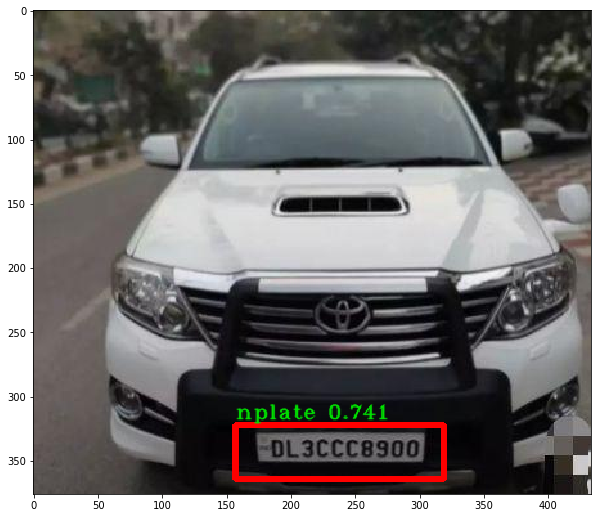

In [0]:
path = '/content/testfolder/test10.jpg'

img, text = predict(path, config)

print(text)
print('-'*40)
plt.figure(figsize = (10,20))
plt.imshow(img)